***Total: 42 points***

Complete this homework by writing R code to complete the following tasks. Keep in mind:

i. Empty chunks have been included where code is required
ii. For Problem 2e, you should include a image (screen shot), which can be loaded into R
iii. This homework requires use of data files:

  - `BRCA.genome_wide_snp_6_broad_Level_3_scna.seg` (Problems 1, 2)
  - `GIAB_highconf_v.3.3.2.vcf.gz` (Problem 3)
  
iv. You will be graded on your code and output results (knitted .html file). The assignment is worth 42 points total; partial credit can be awarded.

This assignment is due on **Dec 1, 2022**. 

For additional resources, please refer to these links:  
Problems 1 & 2:  
  - https://www.bioconductor.org/packages/devel/bioc/vignettes/plyranges/inst/doc/an-introduction.html
  - https://bioconductor.org/packages/release/bioc/vignettes/GenomicRanges/inst/doc/GenomicRangesIntroduction.html  
Problem 3:  
  - https://bioconductor.org/packages/release/bioc/vignettes/Rsamtools/inst/doc/Rsamtools-Overview.pdf  
Problem 4: 
  - https://bioconductor.org/packages/release/bioc/vignettes/VariantAnnotation/inst/doc/VariantAnnotation.pdf  

# Problem 1: Overlaps between genomic regions and copy number alterations. (14 points total)

### Preparation
Load copy number segment results as shown in *2.1 BED format* of *Lecture16_GenomicData.Rmd*. You will use the same file as in the lecture notes, `BRCA.genome_wide_snp_6_broad_Level_3_scna.seg`. Here is code to get you started.

In [42]:
#load packages
suppressPackageStartupMessages({
    library(tidyverse)
    library(GenomicRanges)
    library(plyranges)
    library(VariantAnnotation)
})

# Tidy up the data and convert to GRanges
segs <- read.delim("BRCA.genome_wide_snp_6_broad_Level_3_scna.seg", as.is = TRUE)   # Read in the .seg file
mode(segs$Chromosome) <- "character"                                                # Change the class of the chromosome to character
segs[segs$Chromosome == 23, "Chromosome"] <- "X"                                    # Change chromosome 23 to X 
segs.gr <- as(segs, "GRanges")                                                      # Convert the dataframe into a GRanges object

### a. Find the segments in `segs.gr` that have *any* overlap with the region `chr8:128,746,347-128,755,810` (4 points)
Print out the first five unique TCGA IDs.

In [43]:
# List the top 5 samples with overlap in specified region
GR_00 <- GRanges( seqnames = '8', ranges = IRanges( start = 128746347, end = 128755810))    # Create a range with specified coordinates
hits_00 <- findOverlaps(query = GR_00, subject = segs.gr, type = "any")                     # Find overlaps in your GRanges object and the range
as.list(segs.gr[subjectHits(hits_00)[0:5]]$Sample)                                          # List the top 5 TCGA IDs in your overlaps

[[1]]
[1] "TCGA-3C-AAAU-10A-01D-A41E-01"

[[2]]
[1] "TCGA-3C-AAAU-01A-11D-A41E-01"

[[3]]
[1] "TCGA-3C-AALI-10A-01D-A41E-01"

[[4]]
[1] "TCGA-3C-AALI-01A-11D-A41E-01"

[[5]]
[1] "TCGA-3C-AALJ-10A-01D-A41E-01"

### b. Find the mean of the `Segment_Mean` values for copy number segments that have *any* overlap with the region chr17:37,842,337-37,886,915. (4 points)

In [44]:
# Find the mean of all segment means in a specified region
GR_01 <- GRanges( seqnames = '17', ranges = IRanges( start = 37842337, end = 37886915)) # Create a range with specified coordinates
hits_01 <- findOverlaps(query = GR_01, subject = segs.gr, type = "any")                 # Find overlaps in your GRanges object and the range

print('Here are all means:')
sort(segs.gr[subjectHits(hits_01)[]]$Segment_Mean)                                      # Sort and print all of the means

mean <- mean(segs.gr[subjectHits(hits_01)[]]$Segment_Mean)                              # Calculate the mean of all means
sprintf('The mean of all means is %f', mean)

[1] "Here are all means:"


[1] -0.7809 -0.7540 -0.7452 -0.7313 -0.7307 -0.7272 -0.7116 -0.7108 -0.6915
  [10] -0.6725 -0.6694 -0.6271 -0.6233 -0.6210 -0.6089 -0.6025 -0.6024 -0.5983
  [19] -0.5870 -0.5729 -0.5618 -0.5602 -0.5558 -0.5527 -0.5490 -0.5478 -0.5433
  [28] -0.5354 -0.5350 -0.5311 -0.5276 -0.5261 -0.5238 -0.5207 -0.5205 -0.5159
  [37] -0.5145 -0.5055 -0.5054 -0.5014 -0.4802 -0.4764 -0.4761 -0.4753 -0.4719
  [46] -0.4661 -0.4568 -0.4529 -0.4512 -0.4504 -0.4456 -0.4442 -0.4391 -0.4372
  [55] -0.4329 -0.4296 -0.4283 -0.4266 -0.4260 -0.4254 -0.4249 -0.4213 -0.4186
  [64] -0.4129 -0.4106 -0.4072 -0.4046 -0.3995 -0.3939 -0.3879 -0.3879 -0.3877
  [73] -0.3869 -0.3857 -0.3852 -0.3836 -0.3835 -0.3819 -0.3819 -0.3813 -0.3798
  [82] -0.3791 -0.3781 -0.3778 -0.3768 -0.3764 -0.3754 -0.3710 -0.3709 -0.3695
  [91] -0.3680 -0.3622 -0.3616 -0.3604 -0.3599 -0.3597 -0.3596 -0.3593 -0.3590
 [100] -0.3582 -0.3559 -0.3555 -0.3535 -0.3527 -0.3512 -0.3478 -0.3401 -0.3396
 [109] -0.3383 -0.3382 -0.3368 -0.3364 -0.3323 -0.3280 -0.3269 -0.3263 -0.3247
 [118] -0.3238 -0.3226 -0.3224 -0.3202 -0.3190 -0.3190 -0.3186 -0.3145 -0.3108
 [127] -0.3098 -0.3095 -0.3083 -0.3080 -0.3036 -0.3006 -0.3004 -0.2984 -0.2971
 [136] -0.2923 -0.2894 -0.2885 -0.2853 -0.2845 -0.2827 -0.2811 -0.2796 -0.2783
 [145] -0.2772 -0.2755 -0.2742 -0.2734 -0.2724 -0.2705 -0.2704 -0.2702 -0.2677
 [154] -0.2654 -0.2650 -0.2645 -0.2637 -0.2620 -0.2596 -0.2562 -0.2553 -0.2547
 [163] -0.2537 -0.2533 -0.2530 -0.2512 -0.2510 -0.2485 -0.2482 -0.2475 -0.2465
 [172] -0.2424 -0.2404 -0.2375 -0.2372 -0.2347 -0.2321 -0.2311 -0.2308 -0.2296
 [181] -0.2275 -0.2250 -0.2249 -0.2202 -0.2189 -0.2182 -0.2170 -0.2163 -0.2160
 [190] -0.2157 -0.2148 -0.2143 -0.2126 -0.2115 -0.2097 -0.2088 -0.2080 -0.2072
 [199] -0.2048 -0.2039 -0.2026 -0.1963 -0.1962 -0.1951 -0.1904 -0.1873 -0.1828
 [208] -0.1817 -0.1811 -0.1810 -0.1791 -0.1790 -0.1784 -0.1778 -0.1742 -0.1728
 [217] -0.1709 -0.1705 -0.1696 -0.1629 -0.1625 -0.1622 -0.1607 -0.1604 -0.1599
 [226] -0.1591 -0.1589 -0.1588 -0.1583 -0.1559 -0.1546 -0.1532 -0.1526 -0.1526
 [235] -0.1507 -0.1446 -0.1428 -0.1419 -0.1408 -0.1400 -0.1398 -0.1375 -0.1364
 [244] -0.1364 -0.1345 -0.1338 -0.1311 -0.1305 -0.1283 -0.1277 -0.1261 -0.1261
 [253] -0.1247 -0.1245 -0.1231 -0.1226 -0.1204 -0.1203 -0.1196 -0.1194 -0.1194
 [262] -0.1193 -0.1187 -0.1180 -0.1172 -0.1168 -0.1167 -0.1128 -0.1125 -0.1103
 [271] -0.1088 -0.1080 -0.1069 -0.1067 -0.1066 -0.1040 -0.1039 -0.1036 -0.1034
 [280] -0.1026 -0.1017 -0.0993 -0.0991 -0.0959 -0.0954 -0.0945 -0.0933 -0.0932
 [289] -0.0929 -0.0918 -0.0899 -0.0888 -0.0862 -0.0850 -0.0848 -0.0823 -0.0822
 [298] -0.0815 -0.0801 -0.0780 -0.0769 -0.0754 -0.0748 -0.0736 -0.0720 -0.0711
 [307] -0.0705 -0.0676 -0.0675 -0.0675 -0.0671 -0.0662 -0.0656 -0.0654 -0.0653
 [316] -0.0653 -0.0628 -0.0615 -0.0613 -0.0612 -0.0610 -0.0604 -0.0594 -0.0587
 [325] -0.0586 -0.0584 -0.0583 -0.0578 -0.0577 -0.0568 -0.0553 -0.0541 -0.0537
 [334] -0.0534 -0.0519 -0.0515 -0.0512 -0.0508 -0.0501 -0.0492 -0.0486 -0.0484
 [343] -0.0484 -0.0483 -0.0483 -0.0457 -0.0449 -0.0442 -0.0441 -0.0432 -0.0413
 [352] -0.0410 -0.0401 -0.0400 -0.0398 -0.0398 -0.0394 -0.0393 -0.0390 -0.0388
 [361] -0.0379 -0.0360 -0.0342 -0.0338 -0.0331 -0.0329 -0.0328 -0.0327 -0.0326
 [370] -0.0314 -0.0313 -0.0309 -0.0309 -0.0302 -0.0300 -0.0296 -0.0293 -0.0283
 [379] -0.0281 -0.0281 -0.0280 -0.0276 -0.0270 -0.0268 -0.0267 -0.0261 -0.0254
 [388] -0.0250 -0.0250 -0.0248 -0.0242 -0.0241 -0.0240 -0.0238 -0.0237 -0.0234
 [397] -0.0233 -0.0227 -0.0227 -0.0224 -0.0221 -0.0215 -0.0212 -0.0210 -0.0210
 [406] -0.0197 -0.0197 -0.0197 -0.0197 -0.0194 -0.0192 -0.0189 -0.0189 -0.0188
 [415] -0.0188 -0.0187 -0.0186 -0.0181 -0.0180 -0.0180 -0.0176 -0.0175 -0.0172
 [424] -0.0171 -0.0171 -0.0170 -0.0168 -0.0168 -0.0165 -0.0165 -0.0158 -0.0156
 [433] -0.0155 -0.0155 -0.0154 -0.0152 -0.0151 -0.0149 -0.0140 -0.0139 -0.0135
 [442] -0.0135 -0.0134 -0.0133 -0.0132 -0.0132 -0.0132 -0.0130 -0.0129 -0.0129
 [451] -0.0126 -0.0123 -0.0123 -0.0122 -0.0121 -0.012

[1] "The mean of all means is 0.142020"

### c. Find the patient sample distribution of copy number for `PIK3CA` (hg19). (6 points)
Find the counts of samples with deletion (D; `Segment_Mean < -0.3`), neutral (N; `Segment_Mean >= -0.3 & Segment_Mean <= 0.3`), gain (G; `Segment_Mean > 0.3`) segments that have `any` overlap with `PIK3CA` gene coordinates.  


In [45]:
# Tidy up the data
seqinfo <- Seqinfo(genome = 'hg19')                                                     # Load human genome info for hg19
seqinfo <- keepStandardChromosomes(seqinfo)                                             # Drop non-standard chromosomes
seqlevelsStyle(seqinfo) <- "NCBI"                                                       # Set the style to NCBI naming conventions

# Make a new GRange object of results that overlap with your range of interest
GR_02 <- GRanges( seqnames = '3', ranges = IRanges( start = 178866311, end = 178952497)) # Create a range with specified coordinates
hits_02 <- findOverlaps(query = GR_02, subject = segs.gr, type = 'any')                 # Find overlaps in your GRange object
hits_GRange <- segs.gr[subjectHits(hits_02)[]]                                          # Set your overlaps into a new GRange object 

# Find the total overlaps using countOverlaps
total_count <- countOverlaps(query = GR_02, subject = segs.gr, type = 'any')            # Get the total overlap count as a reality check
sprintf('There are %i total overlaps with PIK3CA', total_count)

# Find the subset of overlaps using plyranges filter verb
deletion_GRange <- hits_GRange %>%                                                      # Assign new variable for filtered GRange
filter(Segment_Mean < -0.3)                                                             # Filter based on segment mean                 
deletion_count <- countOverlaps(query = GR_02, subject = deletion_GRange, type = 'any') # Count your filtered GRange object
sprintf('There are %i patients with deletions', deletion_count)

neutral_GRange <- hits_GRange %>%                                                       # Assign new variable for filtered GRange
filter(Segment_Mean >= -0.3 & Segment_Mean <= 0.3)                                      # Filter based on segment mean                 
neutral_count <- countOverlaps(query = GR_02, subject = neutral_GRange, type = 'any')   # Count your filtered GRange object
sprintf('There are %i patients with neutral copy number', neutral_count)

gain_GRange <- hits_GRange %>%                                                          # Assign new variable for filtered GRange
filter(Segment_Mean > 0.3)                                                              # Filter based on segment mean                 
gain_count <- countOverlaps(query = GR_02, subject = gain_GRange, type = 'any')         # Count your filtered GRange object
sprintf('And there are %i patients with copy number gains', gain_count)

# Double check our results to see if the plyranges filtered counts add up to the total countOverlaps count
count_sum = sum(deletion_count + neutral_count + gain_count)                            
sprintf('To check our result, the sum of the counts is: %i', count_sum)

Warning message in (function (seqlevels, genome, new_style) :
“cannot switch some of hg19's seqlevels from UCSC to NCBI style”


[1] "There are 2227 total overlaps with PIK3CA"

[1] "There are 17 patients with deletions"

[1] "There are 2026 patients with neutral copy number"

[1] "And there are 184 patients with copy number gains"

[1] "To check our result, the sum of the counts is: 2227"

# Problem 2: Frequency of copy number alteration events within genomic regions. (12 points total) 

This problem will continue to use the copy number data stored in `segs.gr`.

### a. Create a genome-wide tile of 1Mb windows for the human genome (`hg19`). (4 points)
See *3.1 Tiling the genome* of *Lecture16_GenomicData.Rmd* for hints.


In [46]:
# Tidy up the data
seqinfo <- Seqinfo(genome = 'hg19')                                                     # Load human genome info for hg19
seqinfo <- keepStandardChromosomes(seqinfo)                                             # Drop non-standard chromosomes
seqlevelsStyle(seqinfo) <- "NCBI"                                                       # Set the style to NCBI naming conventions

# Split the genome into 1Mb tiles
slen <- seqlengths(seqinfo)                                                             # Get the length of the chromosomes
tileWidth <- 1000000                                                                    # Tile size of 1Mb
tiles <- tileGenome(seqlengths = slen, tilewidth = tileWidth,                           # Run the tiling function with your parameters
                    cut.last.tile.in.chrom = TRUE)
tiles

Warning message in (function (seqlevels, genome, new_style) :
“cannot switch some of hg19's seqlevels from UCSC to NCBI style”


GRanges object with 3114 ranges and 0 metadata columns:
         seqnames            ranges strand
            <Rle>         <IRanges>  <Rle>
     [1]        1         1-1000000      *
     [2]        1   1000001-2000000      *
     [3]        1   2000001-3000000      *
     [4]        1   3000001-4000000      *
     [5]        1   4000001-5000000      *
     ...      ...               ...    ...
  [3110]        Y 56000001-57000000      *
  [3111]        Y 57000001-58000000      *
  [3112]        Y 58000001-59000000      *
  [3113]        Y 59000001-59373566      *
  [3114]     chrM           1-16571      *
  -------
  seqinfo: 25 sequences from an unspecified genome

### b. Find the 1Mb window with the most frequent overlapping deletions. (4 points)
Find the 1Mb windows with `any` overlap with deletion copy number segments. Assume a deletion segment is defined as a segment in `segs.gr` having `Segment_Mean < -0.3`. 

Return one of the 1Mb window `Granges` entry with the highest frequency (count) of deletion segments.

Hint: Subset the `segs.gr` to only rows with `Segment_Mean < -0.3`. 

In [53]:
# Find 1 Mb windows with overlap within deletion copy number segments
GRange_subset <- segs.gr %>% filter(Segment_Mean < -0.3)            # First subset segs.gr to only rows with Segment_Mean < -0.3
segs_overlap <- find_overlaps(tiles, GRange_subset)                 # Then find overlaps of the tiles within the GRange subset

# Find the 1 Mb window with the highest frequency of deletion segments
segs_overlap_df <- as.data.frame(segs_overlap)                      # Convert to data frame
count_table <- sort(table(segs_overlap_df$start))                   # Make a sorted table counting the number of occurrences of each tile
print('This is the value of the start of the range with the highest number of occurences, and then the number of occurences')
tail(count_table, 1)                                                # Get the last element in the table (the window with the highest count)

# Return one of the 1Mb window GRanges entry with the highest frequency (count) of deletion segments
segs_overlap_filtered <- segs_overlap %>%                           # Make new GRanges object
filter(start == 25000001)                                           # Filter using the value from the last element in the count table
print('And here is one entry from the 1 Mb entry with the highest count of deletion segments')
segs_overlap_filtered[1]                                            # Print 1 GRange entry

[1] "This is the value of the start of the range with the higherst number of occurences, and then the number of occurences"



25000001 
    3704 

[1] "And here is one entry from the 1 Mb entry with the highest count of deletion segments"


GRanges object with 1 range and 3 metadata columns:
      seqnames            ranges strand |                 Sample Num_Probes
         <Rle>         <IRanges>  <Rle> |            <character>  <integer>
  [1]        1 25000001-26000000      * | TCGA-3C-AALI-01A-11D..      22921
      Segment_Mean
         <numeric>
  [1]      -0.3964
  -------
  seqinfo: 25 sequences from an unspecified genome

### c. Visually inspect the deletion overlap result from part (b) using IGV. (4 points)
Provide a screen shot of IGV at the 1Mb window with the most frequent overlap with deletion segments. The image should include the segments from `BRCA.genome_wide_snp_6_broad_Level_3_scna.seg` loaded. 

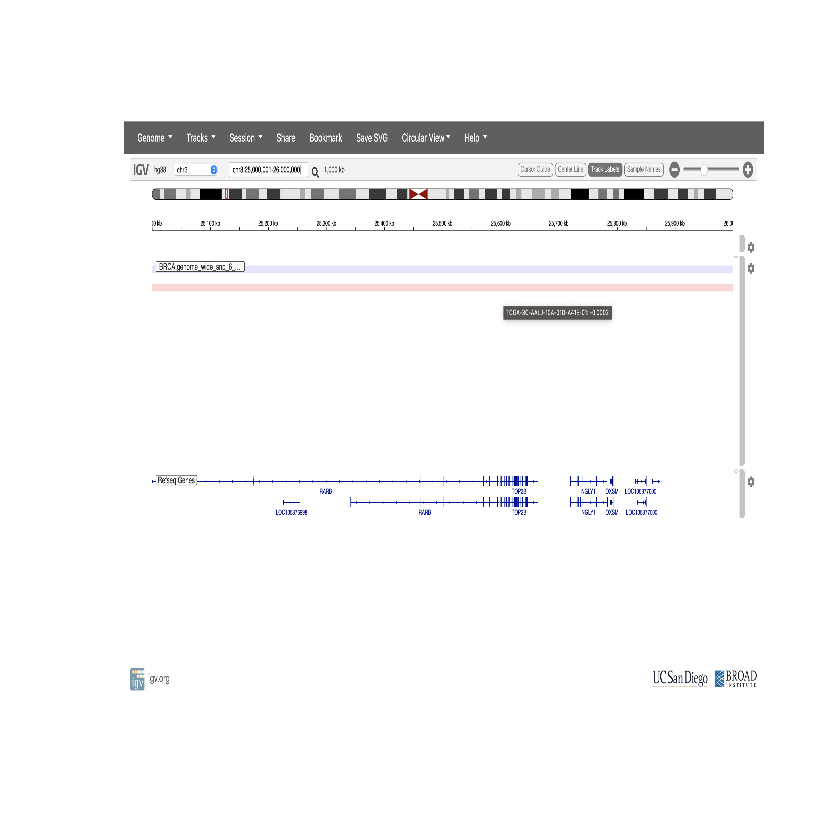

In [48]:
#save screenshot and load into R with png package (see: https://stackoverflow.com/questions/23861000/displaying-images-in-r-in-version-3-1-0)
#install.packages('png') #install if necessary 
library(png)
pp <- readPNG("2022_11_29_TCFB_IGV_screenshot.png")
plot.new() 
rasterImage(pp,0,0,1,1)

# Problem 3: Reading and annotating genomic variants (16 points total)

### Preparation

In [49]:
vcfFile <- "GIAB_highconf_v.3.3.2.vcf.gz"


### a. Load variant data from VCF file `GIAB_highconf_v.3.3.2.vcf.gz` for `chr8:128,700,000-129,000,000`. (4 points)
Note: use genome build `hg19`.

In [50]:
vcfHead <- scanVcfHeader(vcfFile)
GR_03 <- GRanges(seqnames = "8", ranges = IRanges(start = 128700000, end = 129000000))
vcf.param <- ScanVcfParam(which = GR_03)
vcf <- readVcf(vcfFile, genome = "hg19", param = vcf.param)

### b. Combine the fields of the VCF genotype information into a table. (4 points)
You may use your choice of data objects (e.g. `data.frame`).

In [51]:
VCF_df <- info(vcf)
VCF_df

DataFrame with 308 rows and 16 columns
                                  DPSum platforms       platformnames
                              <integer> <integer>     <CharacterList>
rs6984323                            NA         4 Illumina,CG,10X,...
rs4478537                            NA         3     Illumina,CG,10X
rs34141920                           NA         3     Illumina,CG,10X
rs17772814                           NA         4 Illumina,CG,10X,...
rs77977256                           NA         4 Illumina,CG,10X,...
...                                 ...       ...                 ...
rs10808563                           NA         4 Illumina,CG,10X,...
rs71300287                           NA         1            Illumina
8:128997155_CTT/C                    NA         2        Illumina,10X
8:128997161_TTCTTTCTCTTTCTC/T        NA         2        Illumina,10X
rs2392884                            NA         4 Illumina,CG,10X,...
                                 platformbias  data

### c. Retrieve the following information at chr8:128747953. (8 points)
Print out the SNP ID (i.e. "rs ID"), reference base (`REF`), alterate base (`ALT`), genotype (`GT`), depth (`DP`), allele depth (`ADALL`), phase set (`PS`).

Hints: 

  i. `REF` and `ALT` are in the output of `rowRanges(vcf)`. See Section `3a` in `Lecture16_VariantCalls.ipynb` 
  ii. To get the sequence of `DNAString`, use `as.character(x)`.  
  ii. To get the sequence of `DNAStringSet`, use `as.character(unlist(x))`. 
  iii. To expand a list of information for `geno`, use `unlist(x)`.  

  

In [52]:
vcfFile <- "GIAB_highconf_v.3.3.2.vcf.gz"
vcfHead <- scanVcfHeader(vcfFile)
GR_04 <- GRanges(seqnames = "8", ranges = IRanges(start = 128747953))
vcf.param <- ScanVcfParam(which = GR_04)
vcf <- readVcf(vcfFile, genome = "hg19", param = vcf.param)
rowRanges(vcf)
# geno(vcf)$GT[]
# geno(vcf)$DP[]
# geno(vcf)$DALL[]
# geno(vcf)$PS[]
genoData <- data.frame(do.call(cbind, geno(vcf)))
colnames(genoData) <- rownames(geno(header(vcf)))
genoData[]

GRanges object with 1 range and 5 metadata columns:
            seqnames    ranges strand | paramRangeID            REF
               <Rle> <IRanges>  <Rle> |     <factor> <DNAStringSet>
  rs3824120        8 128747953      * |           NA              G
                           ALT      QUAL      FILTER
            <DNAStringSetList> <numeric> <character>
  rs3824120                  T        50        PASS
  -------
  seqinfo: 25 sequences from hg19 genome

,GT,DP,GQ,ADALL,AD,IGT,IPS,PS
,<list>,<list>,<list>,<list>,<list>,<list>,<list>,<list>
rs3824120,0|1,461,668,"105, 94","128, 121",0/1,.,PATMAT
